## Global Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
%matplotlib inline

## Creating Random Plots

In [3]:
from sklearn.datasets.samples_generator import make_blobs

In [4]:
X, y = make_blobs(n_samples=300, centers=3,
                random_state=0, cluster_std=0.60)

In [5]:
all_points = pd.concat( [pd.DataFrame( X ),
                       pd.DataFrame( y ) ],
                     axis = 1 )

In [6]:
all_points.columns = ["x1", "x2", "y"]

In [7]:
all_points.head()

,x1,x2,y
0,0.428577,4.973997,0
1,1.619909,0.067645,1
2,1.432893,4.376792,0
3,-1.578462,3.034458,2
4,-1.658629,2.267460,2


## Draw the points on a graph and find out how they are scattered¶

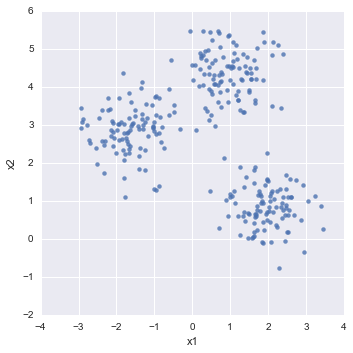

In [8]:
sn.lmplot( "x1", "x2", data=all_points, fit_reg=False, size = 5 )

## Using K-means clustering technique

In [9]:
from sklearn.cluster import KMeans

In [11]:
X = all_points[["x1", "x2"]]
clusters = KMeans(4)  # 3 clusters
clusters.fit( X )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
clusters.cluster_centers_

array([[ 1.95159369,  0.83467497],
       [-1.10112932,  3.27481225],
       [-1.98101448,  2.56992767],
       [ 0.97152755,  4.36899584]])

In [13]:
clusters.labels_

array([3, 0, 3, 1, 2, 1, 0, 3, 2, 1, 0, 0, 0, 3, 0, 1, 3, 3, 1, 0, 2, 3, 0,
       3, 2, 2, 3, 2, 0, 0, 1, 3, 3, 0, 0, 2, 0, 2, 3, 0, 1, 0, 3, 0, 0, 1,
       0, 2, 1, 0, 2, 0, 1, 1, 0, 3, 3, 1, 2, 3, 0, 0, 3, 2, 0, 2, 3, 0, 3,
       0, 1, 1, 2, 1, 0, 3, 0, 2, 3, 3, 2, 3, 0, 3, 3, 3, 0, 2, 3, 3, 1, 0,
       2, 3, 0, 0, 3, 0, 2, 3, 0, 1, 3, 0, 3, 3, 2, 3, 0, 0, 3, 1, 3, 3, 2,
       2, 3, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 3, 2, 2, 0, 1, 3,
       1, 2, 0, 3, 0, 3, 1, 2, 3, 1, 2, 0, 3, 2, 3, 0, 2, 2, 0, 0, 3, 0, 3,
       3, 0, 3, 1, 3, 3, 3, 3, 1, 0, 3, 1, 0, 0, 0, 3, 0, 3, 3, 0, 1, 3, 3,
       3, 3, 0, 2, 3, 1, 3, 3, 0, 0, 2, 3, 0, 2, 3, 2, 0, 2, 3, 2, 0, 1, 3,
       2, 3, 0, 3, 3, 2, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 3, 2, 2, 3, 3, 1,
       3, 0, 0, 3, 0, 2, 2, 2, 3, 3, 0, 1, 1, 1, 2, 0, 1, 2, 3, 0, 0, 3, 0,
       0, 1, 3, 0, 1, 3, 3, 2, 3, 1, 2, 1, 1, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3,
       2, 2, 0, 3, 3, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 3, 3, 1, 0, 3,
       1])

In [14]:
all_points["clusterid_1"] = clusters.labels_

In [15]:
all_points.head()

,x1,x2,y,clusterid_1
0,0.428577,4.973997,0,3
1,1.619909,0.067645,1,0
2,1.432893,4.376792,0,3
3,-1.578462,3.034458,2,1
4,-1.658629,2.267460,2,2


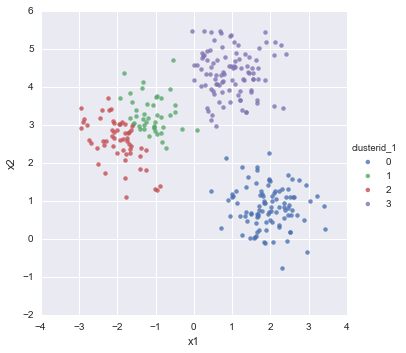

In [16]:
sn.lmplot( "x1", "x2", data=all_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

## How well the points were clustered

In [17]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(all_points.y, all_points.clusterid_1)

1.0

## Does the scale of dimensions impact the clustering?

In [19]:
all_points["x1"] = all_points.x1 * 100

In [18]:
all_points.head()

,x1,x2,y,clusterid_1
0,0.428577,4.973997,0,2
1,1.619909,0.067645,1,0
2,1.432893,4.376792,0,2
3,-1.578462,3.034458,2,1
4,-1.658629,2.267460,2,1


In [20]:
X = all_points[["x1", "x2"]]
clusters = KMeans(3)  # 3 clusters
clusters.fit( X )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

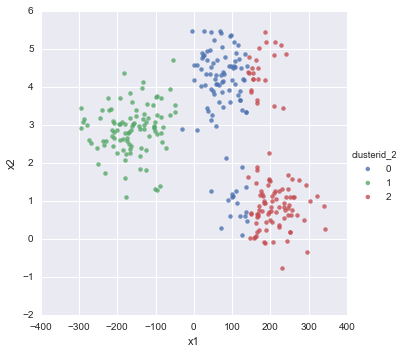

In [21]:
all_points["clusterid_2"] = clusters.labels_
sn.lmplot( "x1", "x2", data=all_points,
        hue = "clusterid_2",
        fit_reg=False, size = 5 )

## Lets Rescale The Dimensions

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

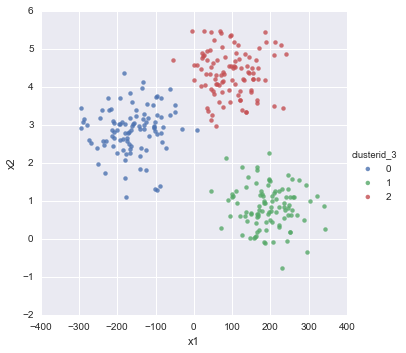

In [23]:
clusters = KMeans(3)  # 3 clusters
clusters.fit( X_scaled )
all_points["clusterid_3"] = clusters.labels_
sn.lmplot( "x1", "x2", data=all_points,
        hue = "clusterid_3",
        fit_reg=False, size = 5 )

## Can K-means work if the clusters are not well segregated.. what if the clustered are interspersed

In [26]:
from sklearn import datasets
moon_points = datasets.make_moons(n_samples=1000, noise=.05)

In [27]:
X, y = enumerate( moon_points )

In [28]:
moon_points = pd.DataFrame( X[1] )

In [29]:
moon_points.columns = ["x1", "x2"]

In [30]:
moon_points["y"] = y[1]

In [31]:
moon_points.head()

,x1,x2,y
0,1.192030,-0.526995,1
1,-0.655636,0.763382,0
2,0.453670,0.925298,0
3,0.551241,0.819810,0
4,0.018099,0.272818,1


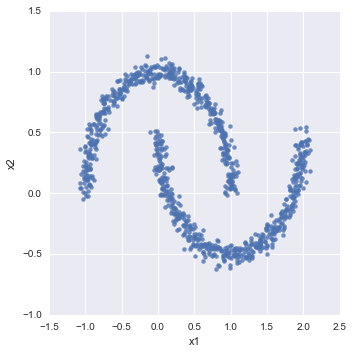

In [32]:
sn.lmplot( "x1", "x2", data=moon_points, fit_reg=False, size = 5 )

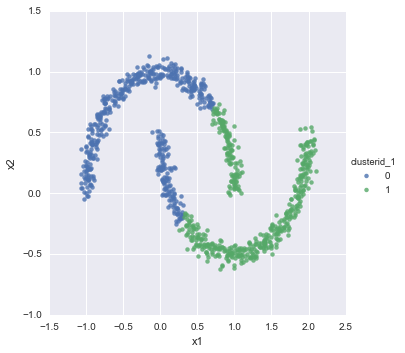

In [33]:
moon_clusters = KMeans(2)  # 3 clusters
moon_clusters.fit( moon_points[["x1", "x2"]] )
moon_points["clusterid_1"] = moon_clusters.labels_
sn.lmplot( "x1", "x2", data=moon_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

## Using DBSCAN for density based clutering

In [36]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.2)

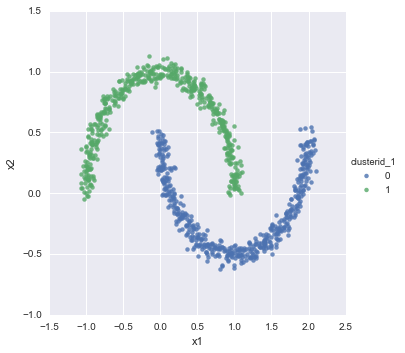

In [35]:
moon_clusters = DBSCAN( eps=.2 )
moon_clusters.fit( moon_points[["x1", "x2"]] )
moon_points["clusterid_1"] = moon_clusters.labels_
sn.lmplot( "x1", "x2", data=moon_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

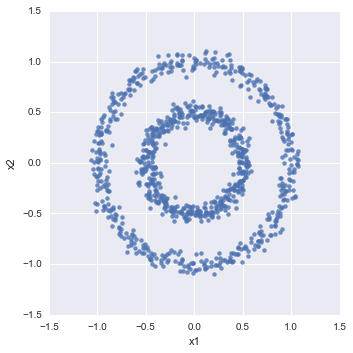

In [37]:
circle_points = datasets.make_circles(n_samples=1000, factor=.5,
                                    noise=.05)
X, y = enumerate( circle_points )
circle_points = pd.DataFrame( X[1] )
circle_points.columns = ["x1", "x2"]
circle_points["y"] = y[1]
circle_points.head()
sn.lmplot( "x1", "x2", data=circle_points, fit_reg=False, size = 5 )

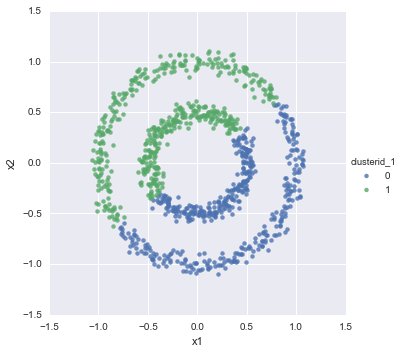

In [38]:
circle_clusters = KMeans(2)  # 3 clusters
circle_clusters.fit( circle_points[["x1", "x2"]] )
circle_points["clusterid_1"] = circle_clusters.labels_
sn.lmplot( "x1", "x2", data=circle_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )

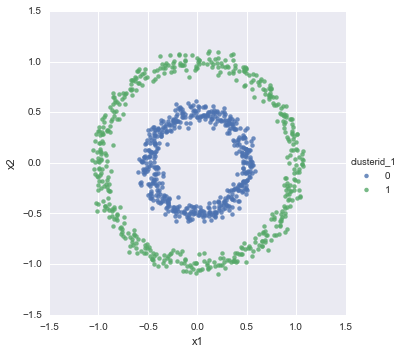

In [39]:
circle_clusters = DBSCAN( eps=.2 )
circle_clusters.fit( circle_points[["x1", "x2"]] )
circle_points["clusterid_1"] = circle_clusters.labels_
sn.lmplot( "x1", "x2", data=circle_points,
        hue = "clusterid_1",
        fit_reg=False, size = 5 )